<a href="https://colab.research.google.com/github/tamannak12/Price_prediction_model/blob/main/price_prediction_arima_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df=pd.read_csv("/content/commodity_prices_india.csv")
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     23093 non-null  float64
 8   Max Price     23093 non-null  float64
 9   Modal Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


In [ ]:
df.describe()

,Min Price,Max Price,Modal Price
count,23093.000000,23093.000000,23093.000000
mean,4187.077045,4976.034260,4602.917742
std,5472.783385,6277.308057,5843.822711
min,0.000000,0.000000,0.830000
25%,1750.000000,2000.000000,1955.000000
50%,2725.000000,3400.000000,3000.000000
75%,5000.000000,6000.000000,5500.000000
max,223500.000000,227500.000000,225500.000000


In [ ]:
df.iloc()

#Data Cleaning

In [ ]:
df.isnull().sum()

,0
State,0
District,0
Market,0
Commodity,0
Variety,0
Grade,0
Arrival_Date,0
Min Price,0
Max Price,0
Modal Price,0


In [ ]:
df.dropna().head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0


# ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Converting 'Arrival_Date' to datetime
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'])

# Grouping 'Arrival_Date' and 'Commodity' calculate the mean price
df = df.groupby(['Arrival_Date', 'Commodity']).agg({'Min Price': 'mean', 'Max Price': 'mean'})

# Grouping 'Arrival_Date' and aggregate
df = df.groupby(level=0).agg({'Min Price': 'mean', 'Max Price': 'mean'})

# Creating complete date range
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Reindexing DataFrame with complete date range
df = df.reindex(date_range)

# missing values Fill
df = df.fillna(method='ffill')

# Fiting ARIMA model
model = ARIMA(df['Min Price'], order=(5,0,0))
model_fit = model.fit()

# predictions
predictions = model_fit.predict(start=len(df), end=len(df)+10)
print(predictions)
df['ARIMA_Predictions'] = predictions
display(df)
df.head(10)

<ipython-input-8-ccd8be214382>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'])
<ipython-input-8-ccd8be214382>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


2023-08-03    7055.993001
2023-08-04    9097.925276
2023-08-05    4989.949145
2023-08-06    8514.332067
2023-08-07    8713.478997
2023-08-08    6197.296165
2023-08-09    8477.337219
2023-08-10    9798.464799
2023-08-11    5936.311948
2023-08-12    9915.437360
2023-08-13    9381.572214
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Min Price,Max Price,ARIMA_Predictions
2023-07-27,4482.087232,5315.243707,NaN
2023-07-28,5629.702413,6690.276892,NaN
2023-07-29,8324.732004,9530.833223,NaN
2023-07-30,4114.819892,4866.538479,NaN
2023-07-31,7077.510769,8118.640829,NaN
2023-08-01,7977.754921,10292.856852,NaN
2023-08-02,5286.862998,6074.571803,NaN


,Min Price,Max Price,ARIMA_Predictions
2023-07-27,4482.087232,5315.243707,NaN
2023-07-28,5629.702413,6690.276892,NaN
2023-07-29,8324.732004,9530.833223,NaN
2023-07-30,4114.819892,4866.538479,NaN
2023-07-31,7077.510769,8118.640829,NaN
2023-08-01,7977.754921,10292.856852,NaN
2023-08-02,5286.862998,6074.571803,NaN


In [ ]:
y_pred = model_fit.forecast(steps=len(X_test))[0]

<ipython-input-33-f01cb75413d4>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = model_fit.forecast(steps=len(X_test))[0]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Get the actual values and predictions for the same time period
actual_values = df['Min Price'][-10:]

predictions = predictions[-len(actual_values):]

# Calculate MSE
mse = mean_squared_error(actual_values, predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(actual_values, predictions)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

MSE: 10339648.324281532
RMSE: 3215.5323547247244
MAE: 2544.1180166654135


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model_fit.forecast(steps=len(X_test))

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Add R-squared for model fit

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 75340123.7505469
Root Mean Squared Error (RMSE): 8679.86887864943
Mean Absolute Error (MAE): 6170.916062178592
R-squared (R2): -1.438379123763521


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# 1. Define a threshold for "correct" predictions:
threshold = 50  # Example threshold, adjust based on your data/problem

# 2. Convert your continuous predictions and actual values into binary classes:
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# 3. Calculate accuracy and F1-score based on the binary classes:
accuracy = accuracy_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"Accuracy (Threshold-based): {accuracy}")
print(f"F1-score (Threshold-based): {f1}")

Accuracy (Threshold-based): 0.8783286425633254
F1-score (Threshold-based): 0.9352086695872723


# Data visualization


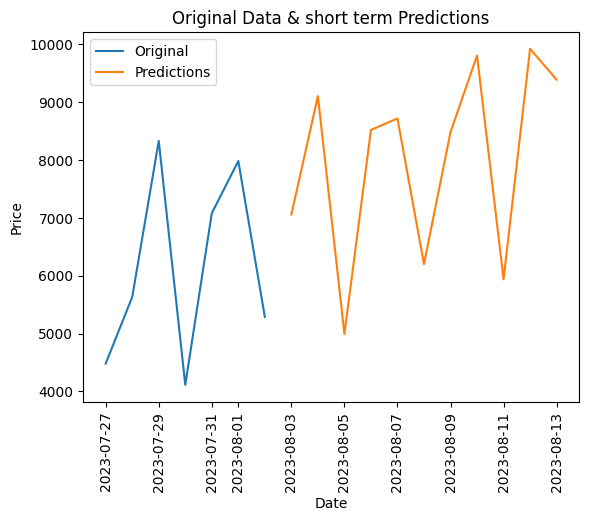

In [ ]:
import matplotlib.pyplot as plt

# Plot the original data
plt.plot(df['Min Price'], label='Original')

# Plot the predictions
plt.plot(predictions, label='Predictions')

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original Data & short term Predictions')

plt.legend()
plt.show()